# Validation of the coordinate transformation function defined in the `pymatcal` module

## import the modules

In [2]:
import sys
sys.path.insert(0, '..')
import pymatcal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


## Generate random coordinates

In [10]:
angle_rad = np.pi/6.0
input_np = np.array([[5, 5, 0]])

# randomly generated points
rng = np.random.default_rng()
npx = 4
ydata = rng.integers(low=0, high=180, size=npx)
xdata = rng.integers(low=0, high=180, size=npx)


### Shape the coordinates to the desired data shape

In [11]:
data1 = np.vstack([xdata, ydata, np.zeros(npx)]).T


## Perform the transformations

### Rotational transformation around x,y = (90,90)

In [12]:
mr, mt = pymatcal.get_mtransform(angle_rad, 90, 90)
data2 = pymatcal.coord_transform(
    mr, mt, data1-np.array((90, 90, 0)))


### Pure translational transformation by dx,dy = (40,-30)

In [13]:
mr, mt = pymatcal.get_mtransform(0, 40, -30)
data3 = pymatcal.coord_transform(
    mr, mt, data1)

## Plot the result

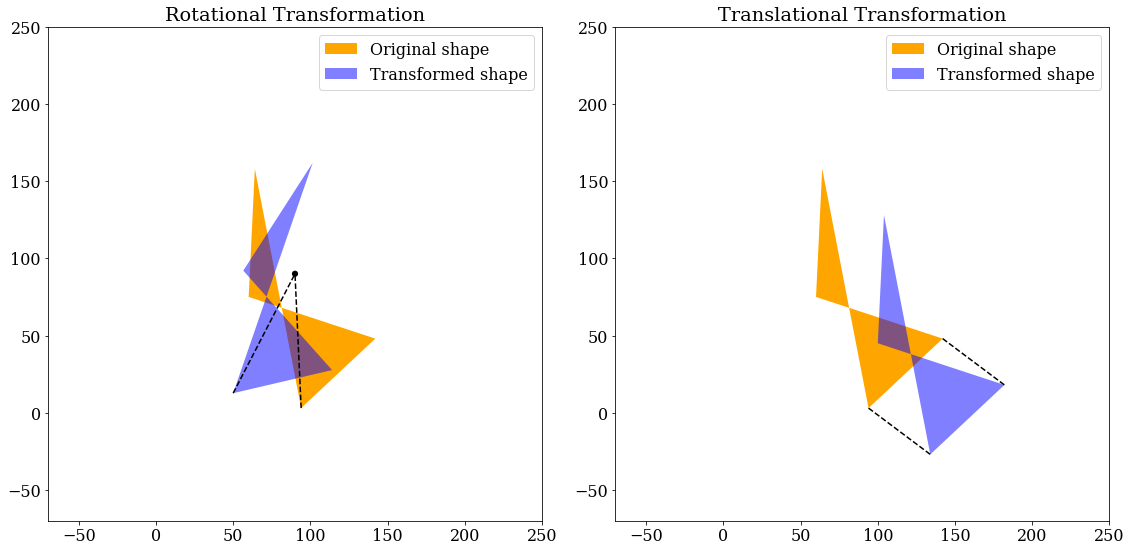

In [14]:
plt.rcParams["font.family"] = "serif"
mpl.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1,2,figsize=(16, 10))
for ax in axs:
    ax.set_xlim(-70, 250)
    ax.set_ylim(-70, 250)
    ax.set_aspect('equal')
axs[0].add_patch(mpl.patches.Polygon(data1[:, 0:2], fc='orange',label='Original shape'))
axs[0].add_patch(mpl.patches.Polygon(data2[:, 0:2], alpha=0.5, fc='blue',label='Transformed shape'))
axs[0].plot([data1[0, 0], 90],
        [data1[0, 1], 90], c='k',ls='--')
axs[0].plot([data2[0, 0], 90],
        [data2[0, 1], 90], c='k',ls='--')
axs[0].add_patch(mpl.patches.Circle((90, 90), 2, fc='k'))
axs[0].legend()
axs[0].set_title("Rotational Transformation")

axs[1].add_patch(mpl.patches.Polygon(data1[:, 0:2], fc='orange',label='Original shape'))
axs[1].add_patch(mpl.patches.Polygon(data3[:, 0:2], alpha=0.5, fc='blue',label='Transformed shape'))
for idx in [0,3]:
        axs[1].plot([data1[idx, 0], data3[idx,0]],
                [data1[idx, 1], data3[idx, 1]], c='k',ls='--')
# axs[1].add_patch(mpl.patches.Circle((90, 90), 2, fc='k'))
axs[1].legend()
axs[1].set_title("Translational Transformation")
fig.tight_layout()
fig.savefig("coordinate-tranformation-module.png")
# plt.show()


### Length is kept the same after the tranformation:

In [21]:
print(np.linalg.norm(data1[0]-data1[2]),np.linalg.norm(data2[0]-data2[2]))


128.01562404644207 128.01562404644207
128.01562404644207 128.01562404644207


### All the data points are shifted exactly the way we want

In [15]:
for dxy in data1-data3:  
    print(dxy)

[-40.  30.   0.]
[-40.  30.   0.]
[-40.  30.   0.]
[-40.  30.   0.]
